# 모델 시연

In [56]:
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F

In [57]:
text1 ='''
It's Crispy Chicken ! Enjoy🍗
＼😆へ　 へ😁ヘ　 く😎/
ヘ / 　　　 ( ヘ　　 　( ヘ
　 >　 　 <　　　　く
'''
text2='''
WaTcH OuT ! It's POODLE 🐶
  ．．．．．/)─―ヘ
  　　　━／　　　　＼
  　 ／　　　　●　　●丶
  　｜　　　　　　　▼　| (침묵)
  　｜　　　　　　　亠ノ 　
  　 U￣U￣￣￣U￣￣U
'''

In [58]:
# 모델 불러오기
model_file = './model/best_model.pth'
saved_model = torch.load(model_file)

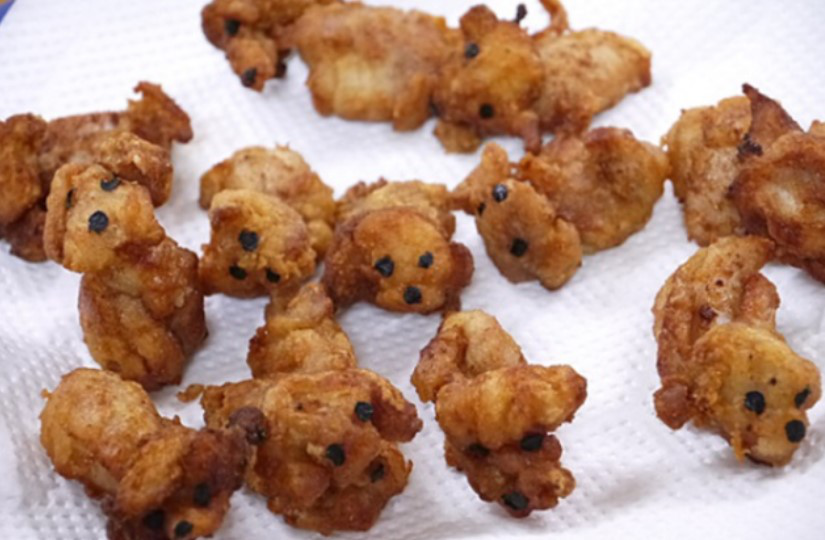

In [59]:
# 시연할 새로운 이미지 준비
# sample_image = "./image/test_dog.jpg"
sample_image = "./image/test_chicken.jpg"
img = Image.open(sample_image)
img

In [60]:
# 모델이 학습된 형태의 이미지로 변환
preprocessing = transforms.Compose([
    transforms.Resize(size = (150, 150)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
p_img = preprocessing(img)
print(p_img.shape)

torch.Size([3, 150, 150])


In [61]:
# 모델 시연 라쓰고
saved_model.eval()

with torch.no_grad():
    p_img = p_img.unsqueeze(dim = 0)
    output = saved_model(p_img)
    output = F.sigmoid(output).item()
print(output)

0.04230355843901634


In [62]:
if output < 0.5: print(text1)
else: print(text2)


It's Crispy Chicken ! Enjoy🍗
＼😆へ　 へ😁ヘ　 く😎/
ヘ / 　　　 ( ヘ　　 　( ヘ
　 >　 　 <　　　　く
